## Lab 2: Dealing with real Data

As mentioned in the first class this semester, one important branch of statistics, called descriptive statistics, is concerned with how we visualize and interpret data. In today's class we will be focused on some aspects of descriptive statistics using real data. 


#### Importing data using the pandas module
The python module that is most commonly used for dealing with data is called "pandas". In order to use this module, you must first install it by running `pip install pandas`. 

In [ ]:
pip install pandas

Data is often stored in either excel files, or as comma separated value files (file extension `.csv`). Included as part of this lab is the example file `NHLHistory.csv`. You can import this file using the function `pandas.read_csv("filename")`, where `filename` replaced by `NHLHistory.csv`. The output is a table (called a "data frame") with a bunch of data about the 100 NHL players who have scored the most points. Each row of the data frame corresponds to a single player, with information about their goals, assists, points, etc.  

In [2]:
import pandas as pd
pd.read_csv("NHLHistory.csv")

,Player,S/C,Pos,GP,G,A,P,+/-,PIM,P/GP,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Wayne Gretzky,L,C,1487,894,1963,2857,520,577,1.92,...,204,890,73,149,2,91,5088,18,--,49
1,Jaromir Jagr,L,R,1733,766,1155,1921,322,1167,1.11,...,217,610,11,15,19,135,5637,14,--,25
2,Mark Messier,L,C,1756,694,1193,1887,211,1912,1.07,...,179,581,63,144,8,92,4221,16,--,55
3,Gordie Howe,R,R,1767,801,1049,1850,160,1685,1.05,...,211,564,24,36,0,121,3803,--,--,--
4,Ron Francis,L,C,1731,549,1249,1798,-18,977,1.04,...,188,727,12,31,4,79,3756,15,--,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Claude Giroux,R,R,1100,329,673,1002,38,452,0.91,...,93,374,7,17,12,52,2862,12,1,56
96,Joe Pavelski,R,C,1250,449,552,1001,189,438,0.80,...,165,362,10,18,4,71,3512,13,1,55
97,Jason Spezza,R,C,1248,363,632,995,5,604,0.80,...,117,366,3,5,3,55,2866,13,1,53
98,Phil Kessel,R,R,1286,413,579,992,-155,402,0.77,...,119,333,1,1,11,70,3849,11,1,42


Once a dataframe is imported, it can be assigned to a variable for later use. Dataframes act a lot like arrays, in that if we want a specific entry, we can refer to it using the index of the entry. However, there are major advantages to dataframes. Each column in the dataframe has a name, and if we want only the values in that column (for example the lead concentrations in the "VALUE" column), we can access that column using dot syntax. I.e. if the dataframe is assigned to the variable `NHL`, then I can access the "Goals" column by writing `NHL.G` or `NHL["G"]`.

In [3]:
NHL = pd.read_csv("NHLHistory.csv")
NHL.G # NHL["G"] also works. If the column name is more than one letter, you will have to use this option

0     894
1     766
2     694
3     801
4     549
     ... 
95    329
96    449
97    363
98    413
99    402
Name: G, Length: 100, dtype: int64

#### Visualizing Data using histograms

In order to plot anything, we will have to add the `matplotlib` python module (run `pip install matplotlib` in a python block). This is a module for making graphs and plots, based around matlab's plotting features. We actually want to use the `pyplot` submodule from `matplotlib`, which we will import as `plt`.

A histogram (or bar chart) is a method of summarizing data by adding each data point to a "bin". Each bin is plotted as a rectangle with width covering the range of data included in the bin, and height equal to the number of points that fall into that bin. We can plot a histogram using the command `plt.hist(array)` where `array` should be replaced by whatever data set you are using. In this case we will use `NHL.P` which is the points column in the NHL data set. 

By default, the data will be split up into 10 bins of equal width. We can override this behaviour by passing an additional argument to the `plt.hist()` function to specify the number of bins, or a range for where the bins should start and end. Try using the option `bins = range(950,3000,50)` and `bins = 30` to see how the histogram changes.

There are also other options we can pass to the plot in order to customize how it looks. For example, we can outline the rectangles in the histogram by adding `edgecolor = 'black'`



(array([46., 27., 16.,  4.,  6.,  0.,  0.,  0.,  0.,  1.]),
 array([ 989. , 1175.8, 1362.6, 1549.4, 1736.2, 1923. , 2109.8, 2296.6,
        2483.4, 2670.2, 2857. ]),
 <BarContainer object of 10 artists>)

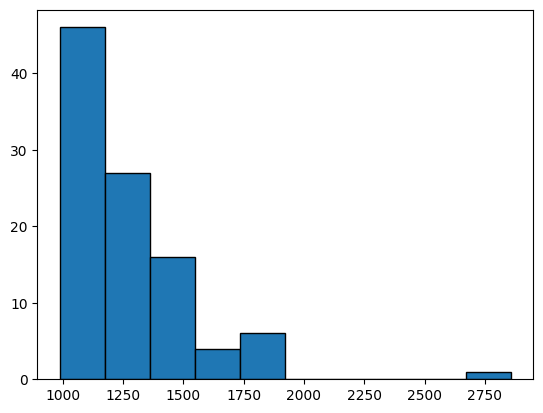

In [30]:
from matplotlib import pyplot as plt
plt.hist(NHL.P, bins = 10, edgecolor='black') # Histogram for nhl points. 


#### Visualizing Data using Box Plots

Box plots (or box and whisker plots) are a common way to visualize data. They are constructed in a way to give important information about the center of the data, and the spread of the data. In order to understand the quantities that go into creating a box plot, we must first introduce the idea of <i>quartiles </i>.

##### Quartiles

Every data set with four or more data points will have three quartiles. These quartiles are values that&mdash;when the data is sorted in ascending order&mdash;will partition the data into four equally sized sets. For example, consider the data set
$$ \{1,2,2,3,4,5,5,6,7,8,9,9, 10, 14,15,15\},$$
which contains 16 data points. the quartiles are three values that split this set into four equal sets of four. The first quartile is $q_1=3.5$ the second quartile is $q_2 = 6.5$, and the third quartile is $q_3 = 9.5$. The resulting partition is the four sets 
$$ \{1,2,2,3\}, \quad \{4,5,5,6\},\quad \{7,8,9,9\},~\text{and}~\{10,14,15,15\}.$$
All of the values in the first set are less than $q_1$, all of the values in the second set are greater than $q_1$ but less than $q_2$, all of the values in the third set are greater than $q_2$ but less than $q_3$, and all of the values in the final set are greater than $q_3$.

The second quartile is special, since it partitions the data set into two equally sized pieces. We also refer to the second quartile as <i>the median.</i>  

An important measure of the spread of a data set is the <i> interquartile range</i>, which is the difference between the third quartile and the second quartile, $\Delta_q = q_3-q_1$. The interquartile range is the center range in which half of the data points lie. 

##### Outliers 

One way to determine if a data point is an outlier is to compare where it lies relative to the 1st or 3rd quartiles. A data point $x$ is a low outlier if $x< q_1 - 1.5\Delta_q$. A data point $x$ is a high outlier if $x > q_3 + 1.5\Delta_q$. This means that if the data point is more than 1.5 interquartile ranges away from the middle half of the data, it can be considered an outlier. If it is more than 4 interquartile ranges away from the middle half of the data, it would be considered an extreme outlier. 

#### To create a box plot

1. A horizontal line segment is drawn indicating median of the data, $q_2$.
2. A box is drawn from the first quartile $q_1$ to the third quartile $q_3$. 
3. A small horizontal line segment is drawn for the smallest data point that is not an outlier, and another for the largest data point that is not an outlier. 
4. vertical lines are drawn from  the center of these horizontal lines to the nearest quartile. 
5. Outliers are indicated using circles. 

To create a boxplot using pyplot, simply use the function `plt.boxplot(data)`

#### Exercises 
1. Use the `NHL` dataframe to make a new dataframe that only contains the values for players who played center. Call it `Centers`
2. Create a boxplot using the `G` column of `Centers`.
3. Determine the quartiles of the goals for left handed players, and compare these with the box plot you have created.
4. Create a similar boxplot for each position.

{'whiskers': [<matplotlib.lines.Line2D at 0x279ca797670>,
 'caps': [<matplotlib.lines.Line2D at 0x279ca797c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x279ca7973a0>],
 'medians': [<matplotlib.lines.Line2D at 0x279ca7c41f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x279ca7c44c0>],
 'means': []}

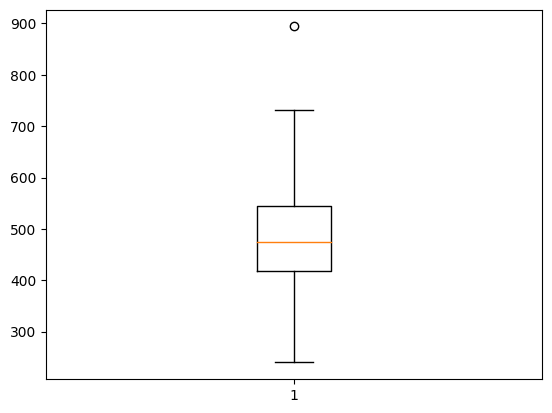

In [27]:
from matplotlib import pyplot as plt
Centers = NHL.query('Pos == "C"')
plt.boxplot(Centers.G)

From the plot, the first quartile appears to be about 410, the second quartile appears to be about 475 and the third quartile appears to be about 550. There is one outlier: Wayne Gretzky at 894. 

 We can find out exactly what the quartiles are using the `statistics` module and the `quantiles` function. (you will have to run `pip install statistics` to use this)

In [28]:
## To determine quartiles, import the statistics module
import statistics
q = statistics.quantiles(Centers.G)
print(f"The first quartile is {q[0]}, the median is {q[1]}, and the third quartile is {q[2]}")

The first quartile is 408.0, the median is 475.0, and the third quartile is 549.0


<AxesSubplot:title={'center':'G'}, xlabel='Pos'>

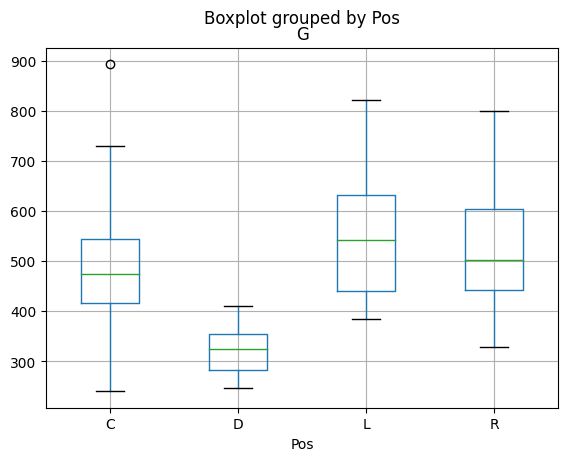

In [29]:
## Note that if we want to plot boxplots for every possibility in the "S/C" Column we can use 
NHL.boxplot(column = "G", by= "Pos")

This gives four boxplots on the same axes. One for the centers, one for defense, one for left wingers, and one for right wingers.

### Tasks

<b>Task 1:</b><br>
Import the data set from <code>spotify.csv</code> as a pandas dataframe. In a markdown box, describe what information is available in the data frame.

<b> Task 2:</b><br>
Create a histogram for the genres in the dataframe. In a markdown box, describe which genres are most represented. 

<b>Task 3:</b> <br>
For each year create a box plot for the song durations. In a markdown box, describe what a typical song length is in minutes and seconds for each year, and any trends you notice.

<b>Task 4:</b><br>
For the year 2000, determine which songs were outliers in terms of song length, and the lengths of those songs.

<b>Task 5</b><br>
Create a new data for only pop songs. Use this new data frame to create a histogram for the year of each song, starting in the year 1995.  What trends do you notice? Customize your histogram in some way.